In [2]:
# Imports
%reload_ext autoreload
%load_ext autoreload
%autoreload 2

%matplotlib inline

import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

sys.path.append('../lib')
import utils
import preprocessing

def log_plot(columns):
    plt.figure(figsize=(20,15))

    for column in columns:
        plt.plot(np.sort(np.log(df_raw[column])), label=column)

    plt.legend(loc='lower right')
    plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Load in data

PATH = "../data/"
df_raw = pd.read_csv(f'{PATH}churn.csv', low_memory=False, 
                     parse_dates=['canceldate', 'licence_registration_date', 'golive_date'])

In [4]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000):
        display(df)

df_raw.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
username,5889,5889,N043311,1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
merchant,5885,5778,Invertek,5,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
canceldate,5889,913,1970-01-01 00:00:00,2776,1970-01-01,2019-09-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
licence_registration_date,5889,1529,2013-11-25 00:00:00,126,2010-07-03,2019-09-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
days_active,5889,NaN,NaN,NaN,NaT,NaT,681.559,566.071,0,196,527,1051,2269
account_status,3127,4,Active,2621,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_account_status,3127,2,Good,2879,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nps,536,NaN,NaN,NaN,NaT,NaT,4.40672,3.5339,0,1,5,8,10
licence_status,5889,4,CANCELLED,3109,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cancel_reason,3111,18,Non-payment (Neto),621,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_processed = preprocessing.prepare_data(df_raw)

COLUMN_NAME = 'annual_revenue'

../lib/preprocessing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['annual_revenue'][dataframe['annual_revenue'] == 0] = dataframe['annual_revenue'].median()
/Users/justinhennessy/anaconda3/envs/fastai/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/justinhennessy/anaconda3/envs/fastai/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Feature has NaN values: annual_revenue
Feature has NaN values: churn_concern_cases_total
Feature has NaN values: churn_concern_cases_open
Feature has NaN values: total_churn_concern_cases_age
Feature has NaN values: churn_concern_cases_avg_hours
Feature has NaN values: golive_days_log


In [6]:
df_processed['annual_revenue'].describe()

count    5.884000e+03
mean     2.982153e+05
std      1.494402e+06
min     -2.400870e+04
25%      9.103570e+03
50%      9.103570e+03
75%      9.398595e+04
max      5.075864e+07
Name: annual_revenue, dtype: float64

In [7]:
array = utils.data_summary_feature(df_processed, COLUMN_NAME)
print(array[0])
print("")
count = 1
for heading in ['Min', 'Max', 'Mean', 'Trimmed Mean', 'Median', 'Std', 'CV']:
    print(f"{heading}: {array[count]}")
    count += 1

annual_revenue

Min: -24008.7
Max: 50758636.69
Mean: 298215.2987967323
Trimmed Mean: 61480.774610651395
Median: 9103.57
Std: 1494402.001002824
CV: 5.011151362899826


In [8]:
df_processed[df_processed[COLUMN_NAME].isna() == True]

,username,team,vertical,salesperson,cases_total,cases_open,cases_closed,cases_age_hours_average,annual_revenue,interactions_total,...,golive_Is_month_end,golive_Is_month_start,golive_Is_quarter_end,golive_Is_quarter_start,golive_Is_year_end,golive_Is_year_start,golive_Elapsed,days_active_log,golive_days_log,cases_age_hours_total_log
212,RGMMaintenance,not specified,Valid Phone,not specified,5,0,0,249,NaN,0.0,...,False,True,False,True,False,True,0,6.255750,NaN,7.093405
102,BabyStorePlus,not specified,not specified,not specified,5,0,0,249,NaN,0.0,...,False,True,False,True,False,True,0,5.164786,NaN,7.093405
101,adminrgmmainte6,not specified,not specified,not specified,5,0,0,249,NaN,0.0,...,False,True,False,True,False,True,0,6.255750,NaN,7.093405
286,AdelajaGroup,not specified,not specified,not specified,5,0,0,249,NaN,0.0,...,False,True,False,True,False,True,0,4.406719,NaN,7.093405
293,deleeuwmarch232,not specified,not specified,ryan,5,0,0,249,NaN,0.0,...,False,True,False,True,False,True,0,5.942799,NaN,7.093405


In [9]:
df_processed[COLUMN_NAME].describe()

count    5.884000e+03
mean     2.982153e+05
std      1.494402e+06
min     -2.400870e+04
25%      9.103570e+03
50%      9.103570e+03
75%      9.398595e+04
max      5.075864e+07
Name: annual_revenue, dtype: float64

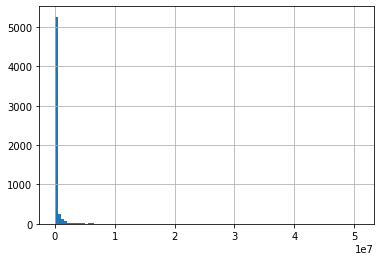

In [10]:
df_processed[COLUMN_NAME].hist(bins=100)

In [11]:
#df_processed.to_csv('./data.csv')
#df_processed[df_processed['plan_PLAN-S-19Q1'] == 1 & df_processed['annual_revenue'] == 0].describe()
#df_processed.query('annual_revenue == 0.0')


In [12]:
#np.sort(df_processed[COLUMN_NAME])[1000:2000]

In [13]:
# Plot sorted unique and non unique values for COLUMN_NAME

#plt.figure(figsize=(20,15))

#plt.plot(np.unique(np.sort(df_processed[COLUMN_NAME])), label=COLUMN_NAME)
#plt.plot(np.sort(df_processed[COLUMN_NAME]), label=COLUMN_NAME)

#plt.legend(loc='lower right')
#plt.show()

In [14]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(20,20))
#plt.scatter(df_processed['days_active_log'],df_processed[COLUMN_NAME], c='b', marker='.', label='median')

#plt.legend(loc='upper left')
#plt.show()

In [15]:
df_processed = preprocessing.logify_feature(df_processed, COLUMN_NAME, False)

#df_processed[COLUMN_NAME+"_log"].describe()

Text(0, 0.5, 'Count')

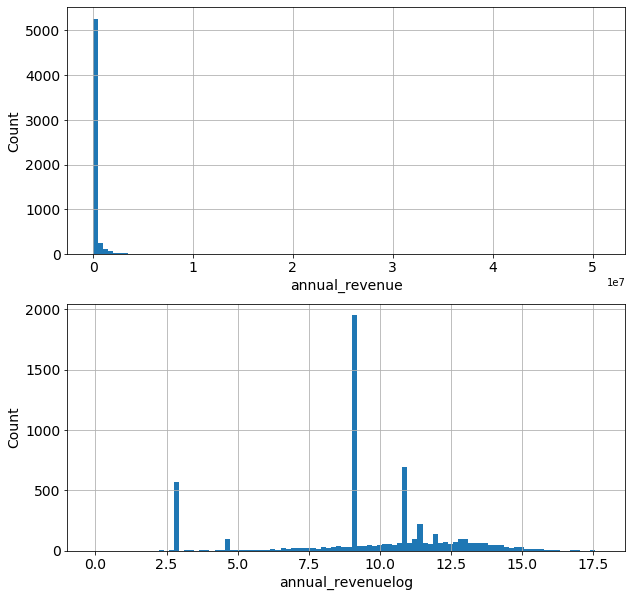

In [16]:
plt.figure(figsize=(10,10))
ax = plt.subplot(2,1,1)
df_processed[COLUMN_NAME].hist(ax=ax, bins=100)
ax.tick_params(labelsize=14)
ax.set_xlabel(COLUMN_NAME, fontsize=14)
ax.set_ylabel('Count', fontsize=14)

ax = plt.subplot(2,1,2)
df_processed[COLUMN_NAME+"_log"].hist(ax=ax, bins=100)
ax.tick_params(labelsize=14)
ax.set_xlabel(COLUMN_NAME+'log', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

In [19]:
# The next step needs only positive values, this will show which rows are <= 0
df_processed[df_processed[COLUMN_NAME] <= 0]

# This is how to replace the <= 0 values with something, mean or median is usually a good idea
df_processed[COLUMN_NAME][df_processed[COLUMN_NAME] <= 0] = df_processed[COLUMN_NAME].median()

/Users/justinhennessy/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [20]:
from scipy import stats
boxcox, bc_params = stats.boxcox(df_processed[COLUMN_NAME])
bc_params

8.472135811722177

In [21]:
df_processed[COLUMN_NAME + '_bc'] = boxcox

Text(0, 0.5, 'Occurrence')

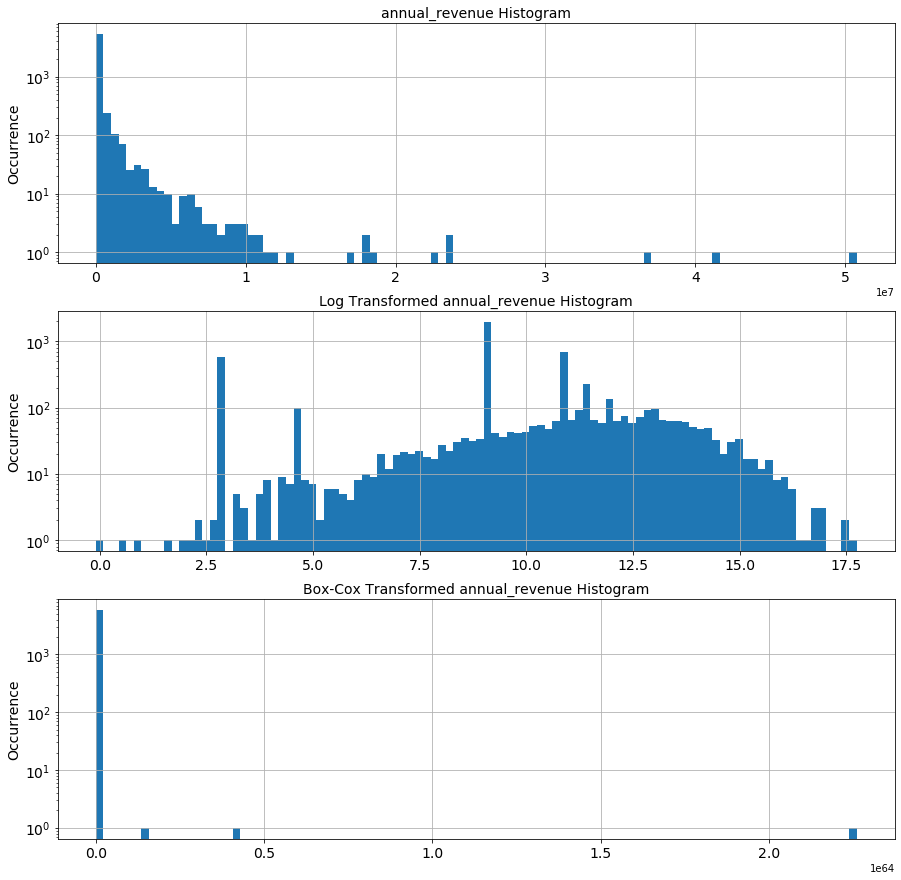

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(15,15))

# original review count histogram
df_processed[COLUMN_NAME].hist(ax=ax1, bins=100)
ax1.set_yscale('log')
ax1.tick_params(labelsize=14)
ax1.set_title(COLUMN_NAME + ' Histogram', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Occurrence', fontsize=14)

# review count after log transform
df_processed[COLUMN_NAME + '_log'].hist(ax=ax2, bins=100)
ax2.set_yscale('log')
ax2.tick_params(labelsize=14)
ax2.set_title('Log Transformed ' + COLUMN_NAME + ' Histogram', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Occurrence', fontsize=14)# review count after optimal Box-Cox transform

df_processed[COLUMN_NAME + '_bc'].hist(ax=ax3, bins=100)
ax3.set_yscale('log')
ax3.tick_params(labelsize=14)
ax3.set_title('Box-Cox Transformed ' + COLUMN_NAME + ' Histogram', fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Occurrence', fontsize=14)